In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

In [11]:
df = pd.read_json('./logins.json')
df["time"] = [d.time() for d in df["login_time"]]
df["date"] = [d.date() for d in df["login_time"]]
df['date'] = df['date'].iloc[0]
df['Datetime'] = df.apply(lambda r : pd.datetime.combine(r['date'],r['time']),1)
df['Datetime'] = pd.DatetimeIndex(df['Datetime'])
df.set_index(df['Datetime'], inplace=True)

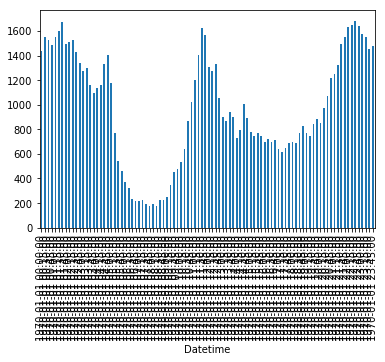

In [3]:
figure = df['login_time'].resample('15T').count().plot('bar')
figsize = [18.0, 4.0]
plt.rcParams['figure.figsize'] = figsize
plt.show()

In [65]:
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)
chal = pd.DataFrame(data)
chal['Retained'] = np.where(chal['last_trip_date'] > '2014-06-01', 1, 0)
chal.fillna(chal.mean(), inplace=True)
chal.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)
chal = pd.get_dummies(chal)
X = chal.drop('Retained', axis=1)
y = chal[['Retained']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=564)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
clf.coef_
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.724666666667


,0,0
0,avg_dist,-0.037653
1,avg_rating_by_driver,-0.129642
2,avg_rating_of_driver,-0.063605
3,avg_surge,-0.187490
4,surge_pct,0.003952
5,trips_in_first_30_days,0.124061
6,ultimate_black_user,0.879003
7,weekday_pct,0.000898
8,city_Astapor,-0.820232
9,city_King's Landing,0.946376
